In [1]:
import sys
sys.path.insert(1, '/home/jovyan/home/tools')
sys.path.insert(1, '/home/jovyan/home/tools/abg_python')
sys.path.insert(1, '/home/jovyan/home/projects/massive-halos/scripts')
sys.path.insert(1, '/home/jovyan/home/tools/FIRE_studio')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from halo_analysis_scripts import load_p0
from firestudio.studios.gas_studio import GasStudio

palettable colormaps are not installed
don't have phil's colormaps
missing firefly api


In [33]:
p0 = load_p0('/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output', 36, Rvir=1)

/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_036.hdf5
This is a cosmological snapshot... converting to physical units
/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_036.hdf5
This is a cosmological snapshot... converting to physical units
Loading redshift 1.9032261810786055


In [34]:
gaspart = {}
gaspart['Coordinates'] = p0['CoordinatesRelative']
gaspart['Masses'] = p0['Masses'] / 1.e10       # <- Putting the masses back into code units is only necessary if you'll be making stellar images (at least, in the version of FIREstudio I've been using)
gaspart['Metallicity'] = p0['Metallicity']
gaspart['SmoothingLength'] = p0['SmoothingLength']
gaspart['BoxSize'] = 30
gaspart['Temperature'] = p0['Temperature']
gaspart['logT'] = np.log10(p0['Temperature'])

In [60]:
gasStudio = GasStudio(
    datadir='/home/jovyan/home/projects/haloviz/data', 
    snapnum=36,
    sim_name = 'h206_push',
    gas_snapdict = gaspart,
    frame_half_width = 15,
    frame_half_thickness = 50,
    loud=False)

In [58]:
%matplotlib inline 

cache npix1200_width30.00kpc_depth50.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} success!
min_logT =  3
max_logT =  8
Image range (logT):  1.806647 6.566886
Image range (8bit):  0.0 181.91118


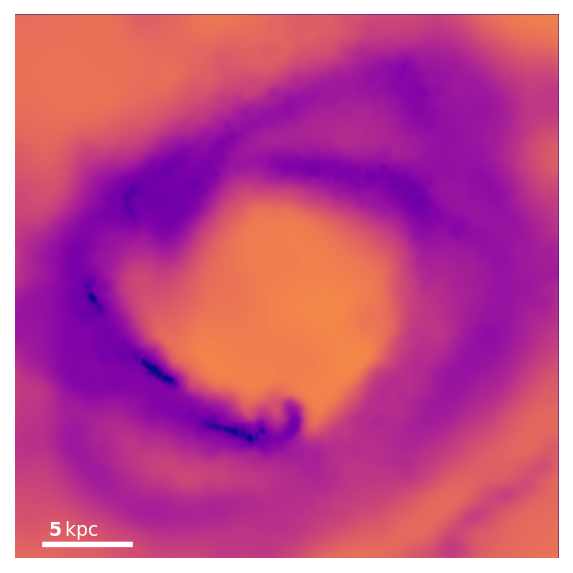

In [63]:
fig, ax = plt.subplots(1, 1, figsize=[4.8,4.8], dpi=150)
tmin=3
tmax=8

gasStudio.render(ax=ax, 
                 weight_name='Masses',
                 quantity_name='logT',
                 min_quantity=tmin,
                 max_quantity=tmax,
                 cmap='plasma',
                 use_metadata=True)
plt.show()